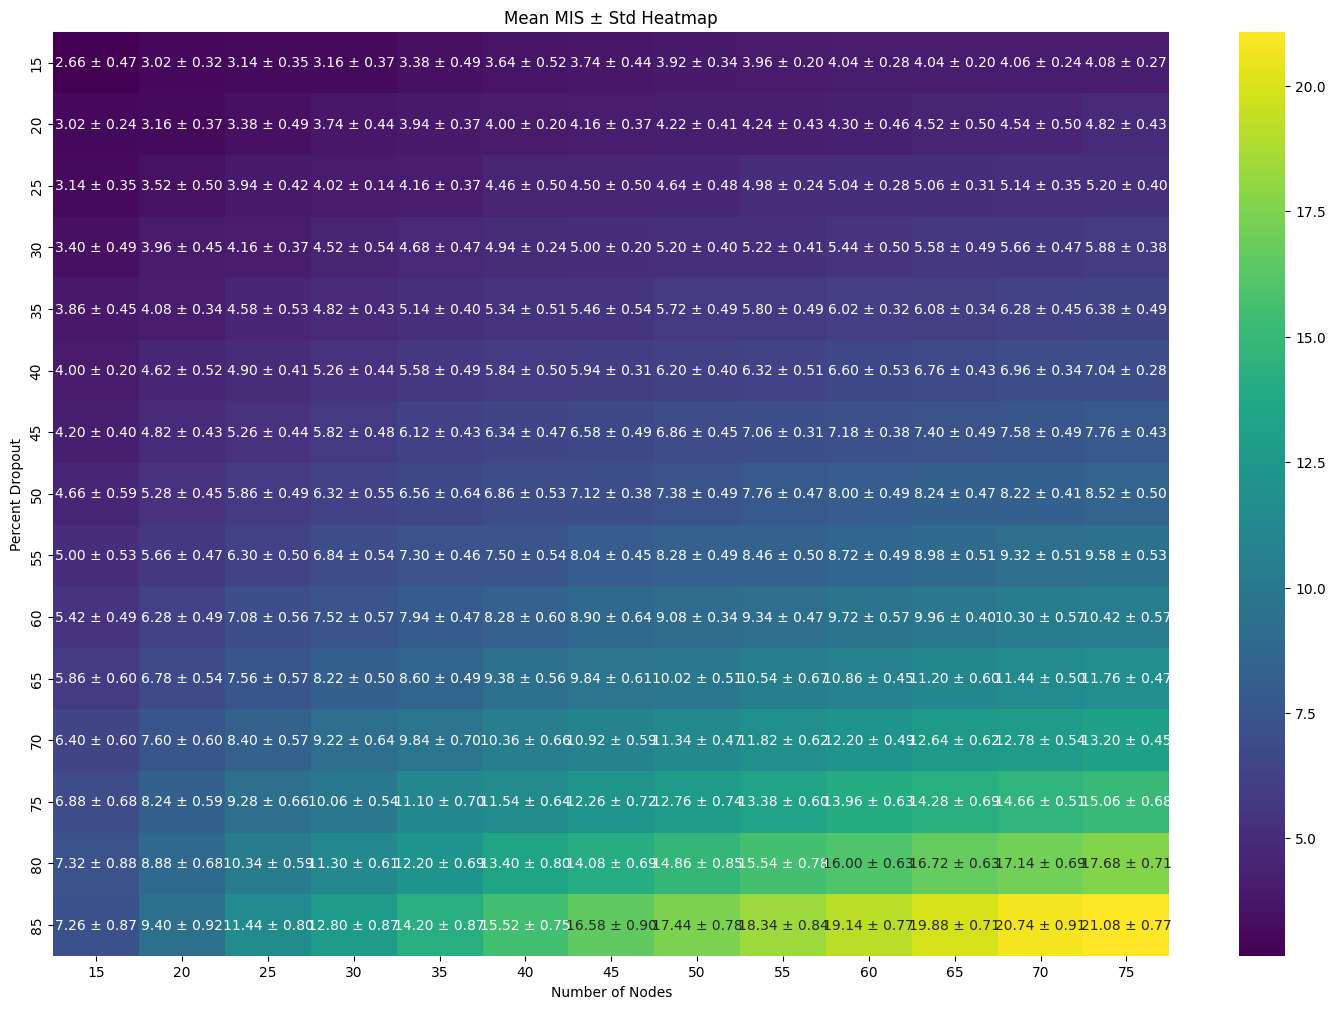

In [26]:
import os
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_mean_std_from_json(directory):
    """
    Loads JSON files from the directory, extracts node count and percent dropout,
    and computes both the mean and standard deviation of MIS for each file.
    Returns a dictionary with keys as (node_count, percent) and values as (mean, std).
    """
    data = {}
    json_pattern = re.compile(r"nodes_(\d+)_removal_(\d+)percent\.json")
    
    for filename in os.listdir(directory):
        if not filename.endswith('.json'):
            continue
        
        match = json_pattern.match(filename)
        if not match:
            continue
        
        n = int(match.group(1))
        percent = int(match.group(2))
        filepath = os.path.join(directory, filename)
        
        with open(filepath, 'r') as f:
            results = json.load(f)
        
        # Extract valid MIS sizes for this file
        mis_sizes = [entry["mis_size"] for entry in results if entry["mis_size"] is not None]
        if mis_sizes:
            mean_mis = sum(mis_sizes) / len(mis_sizes)
            std_mis = np.std(mis_sizes)
        else:
            mean_mis = np.nan
            std_mis = np.nan
        
        data[(n, percent)] = (mean_mis, std_mis)
    
    return data

def create_heatmap_with_std(data):
    """
    Given a dictionary with keys (node_count, percent) and values (mean, std),
    creates and displays a heatmap using seaborn.
    The color intensity is based on the mean, and each cell is annotated
    with "mean ± std".
    """
    # Extract unique node counts and percentages
    node_counts = sorted({key[0] for key in data.keys()})
    percents = sorted({key[1] for key in data.keys()})
    
    # Initialize matrices for mean values and annotation texts
    mean_matrix = np.full((len(percents), len(node_counts)), np.nan)
    annot_matrix = np.empty((len(percents), len(node_counts)), dtype=object)
    
    # Fill the matrices with data
    for (n, percent), (mean_val, std_val) in data.items():
        row = percents.index(percent)
        col = node_counts.index(n)
        mean_matrix[row, col] = mean_val
        annot_matrix[row, col] = f"{mean_val:.2f} ± {std_val:.2f}"
    
    # Create the heatmap with seaborn
    plt.figure(figsize=(18, 12))
    ax = sns.heatmap(
        mean_matrix, 
        annot=annot_matrix, 
        fmt="",  # fmt is not used since annot_matrix already contains formatted strings
        xticklabels=node_counts, 
        yticklabels=percents, 
        cmap="viridis"
    )
    
    ax.set_xlabel("Number of Nodes")
    ax.set_ylabel("Percent Dropout")
    ax.set_title("Mean MIS ± Std Heatmap")
    plt.show()

# Set the directory containing your JSON files
json_dir = "mis_results_grouped"

# Load data from JSON files and compute mean and std values
data = load_mean_std_from_json(json_dir)

# Create and display the heatmap with mean ± std annotations
create_heatmap_with_std(data)


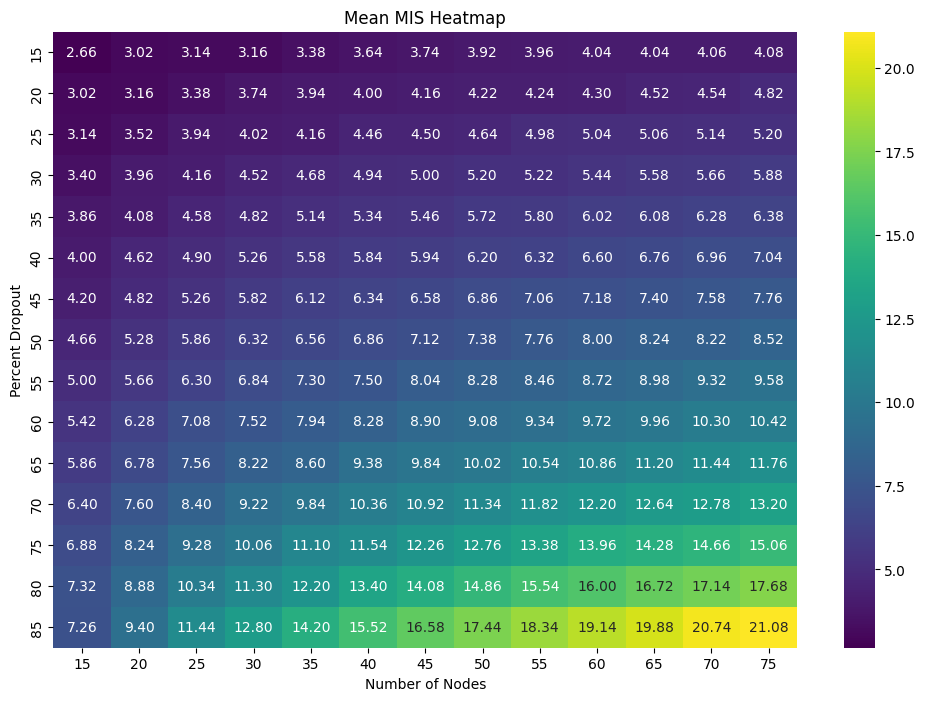

In [27]:
import os
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_mean_mis_from_json(directory):
    """
    Loads JSON files from the directory, extracts node count and percent dropout,
    and computes the mean MIS for each file.
    Returns a dictionary with keys as (node_count, percent) and values as mean MIS.
    """
    data = {}
    json_pattern = re.compile(r"nodes_(\d+)_removal_(\d+)percent\.json")
    
    for filename in os.listdir(directory):
        if not filename.endswith('.json'):
            continue
        
        match = json_pattern.match(filename)
        if not match:
            continue
        
        n = int(match.group(1))
        percent = int(match.group(2))
        filepath = os.path.join(directory, filename)
        
        with open(filepath, 'r') as f:
            results = json.load(f)
        
        # Compute mean MIS size for this file
        mis_sizes = [entry["mis_size"] for entry in results if entry["mis_size"] is not None]
        if mis_sizes:
            mean_mis = sum(mis_sizes) / len(mis_sizes)
        else:
            mean_mis = np.nan  # If no valid MIS size found
        
        data[(n, percent)] = mean_mis
    
    return data

def create_heatmap(data):
    """
    Given a dictionary with keys (node_count, percent) and mean MIS values,
    creates and displays a heatmap using seaborn.
    """
    # Extract unique node counts and percentages
    node_counts = sorted({key[0] for key in data.keys()})
    percents = sorted({key[1] for key in data.keys()})
    
    # Initialize a matrix to hold mean MIS values
    heatmap_data = np.full((len(percents), len(node_counts)), np.nan)
    
    # Fill the matrix with mean MIS data
    for (n, percent), mean_mis in data.items():
        row = percents.index(percent)
        col = node_counts.index(n)
        heatmap_data[row, col] = mean_mis
    
    # Create the heatmap with seaborn
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        xticklabels=node_counts, 
        yticklabels=percents, 
        cmap="viridis"
    )
    
    ax.set_xlabel("Number of Nodes")
    ax.set_ylabel("Percent Dropout")
    ax.set_title("Mean MIS Heatmap")
    plt.show()

# Set the directory containing your JSON files
json_dir = "mis_results_grouped"

# Load data from JSON files and compute mean MIS values
data = load_mean_mis_from_json(json_dir)

# Create and display the heatmap
create_heatmap(data)


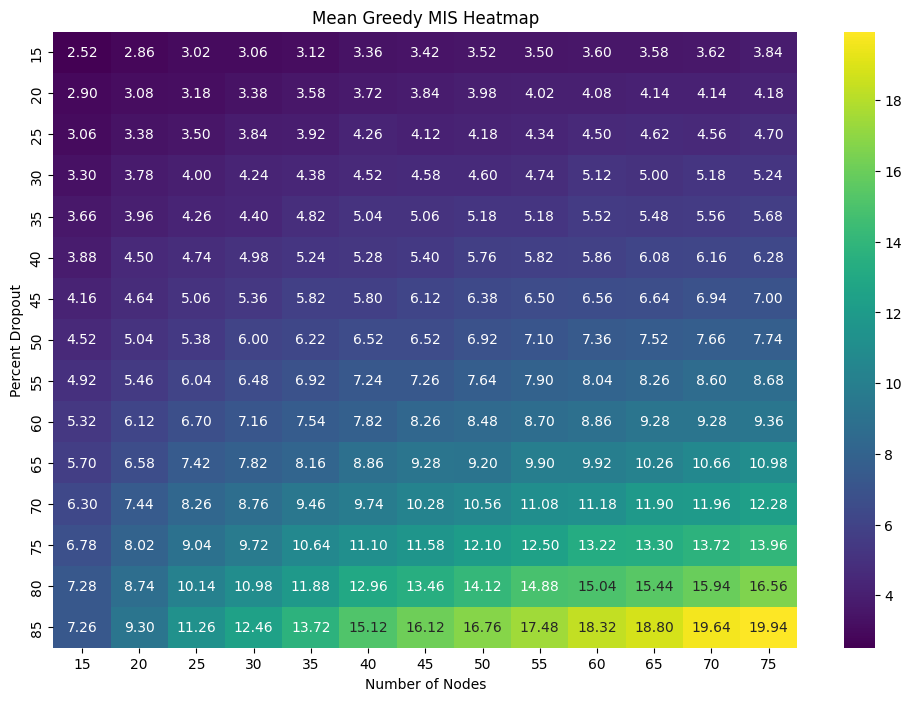

In [28]:
import os
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_mean_mis_from_json(directory):
    """
    Loads JSON files from the directory, extracts node count and percent dropout,
    and computes the mean MIS for each file.
    Returns a dictionary with keys as (node_count, percent) and values as mean MIS.
    """
    data = {}
    json_pattern = re.compile(r"nodes_(\d+)_removal_(\d+)percent_greedy\.json")
    
    for filename in os.listdir(directory):
        if not filename.endswith('.json'):
            continue
        
        match = json_pattern.match(filename)
        if not match:
            continue
        
        n = int(match.group(1))
        percent = int(match.group(2))
        filepath = os.path.join(directory, filename)
        
        with open(filepath, 'r') as f:
            results = json.load(f)
        
        # Compute mean MIS size for this file
        mis_sizes = [entry["greedy_mis_size"] for entry in results if entry["greedy_mis_size"] is not None]
        if mis_sizes:
            mean_mis = sum(mis_sizes) / len(mis_sizes)
        else:
            mean_mis = np.nan  # If no valid MIS size found
        
        data[(n, percent)] = mean_mis
    
    return data

def create_heatmap(data):
    """
    Given a dictionary with keys (node_count, percent) and mean MIS values,
    creates and displays a heatmap using seaborn.
    """
    # Extract unique node counts and percentages
    node_counts = sorted({key[0] for key in data.keys()})[:13]
    percents = sorted({key[1] for key in data.keys()})
    
    # Initialize a matrix to hold mean MIS values
    # heatmap_data = np.full((len(percents), len(node_counts)), np.nan)
    heatmap_data = np.full((len(percents), len([n for n in node_counts if n < 80])), np.nan)

    # Fill the matrix with mean MIS data
    for (n, percent), mean_mis in data.items():
        if n < 80:
            row = percents.index(percent)
            col = node_counts.index(n)
            heatmap_data[row, col] = mean_mis
    
    # Create the heatmap with seaborn
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        xticklabels=node_counts, 
        yticklabels=percents, 
        cmap="viridis"
    )
    
    ax.set_xlabel("Number of Nodes")
    ax.set_ylabel("Percent Dropout")
    ax.set_title("Mean Greedy MIS Heatmap")
    plt.show()

# Set the directory containing your JSON files
json_dir = "greedy_mis_results_grouped"

# Load data from JSON files and compute mean MIS values
data = load_mean_mis_from_json(json_dir)

# Create and display the heatmap
create_heatmap(data)


Brute force file not found for nodes=105, percent=55. Skipping.
Brute force file not found for nodes=95, percent=55. Skipping.
Brute force file not found for nodes=140, percent=55. Skipping.
Brute force file not found for nodes=120, percent=45. Skipping.
Brute force file not found for nodes=115, percent=50. Skipping.
Brute force file not found for nodes=85, percent=50. Skipping.
Brute force file not found for nodes=130, percent=40. Skipping.
Brute force file not found for nodes=150, percent=50. Skipping.
Brute force file not found for nodes=120, percent=55. Skipping.
Brute force file not found for nodes=140, percent=45. Skipping.
Brute force file not found for nodes=105, percent=45. Skipping.
Brute force file not found for nodes=95, percent=45. Skipping.
Brute force file not found for nodes=150, percent=40. Skipping.
Brute force file not found for nodes=130, percent=50. Skipping.
Brute force file not found for nodes=115, percent=40. Skipping.
Brute force file not found for nodes=85, pe

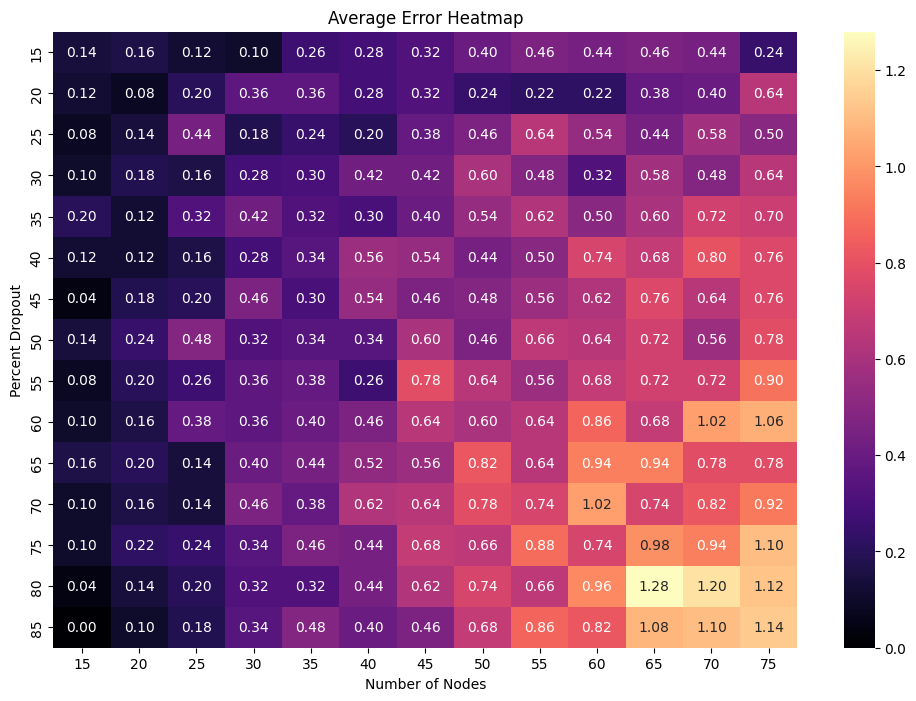

In [29]:
import os
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_results_by_iteration(filepath, size_key):
    """
    Loads a JSON file and creates a dictionary of iteration -> MIS size.
    Only entries with valid iteration and MIS size are stored.
    """
    with open(filepath, 'r') as f:
        results = json.load(f)
    
    size_dict = {}
    for entry in results:
        iteration = entry.get("iteration")
        if iteration is not None:
            mis_size = entry.get(size_key)
            if mis_size is not None:
                size_dict[iteration] = mis_size
    
    return size_dict

def compute_average_error(greedy_dir, brute_dir):
    """
    Computes the average error for each combination of node count and percent dropout,
    comparing greedy MIS to brute force MIS by matching iteration numbers.
    Returns a dictionary with keys as (node_count, percent) and values as average error.
    """
    avg_error_data = {}
    # Pattern to match greedy JSON filenames, e.g., "nodes_15_removal_85percent_greedy.json"
    json_pattern = re.compile(r"nodes_(\d+)_removal_(\d+)percent_greedy\.json")
    
    for filename in os.listdir(greedy_dir):
        match = json_pattern.match(filename)
        if not match:
            continue
        
        n = int(match.group(1))
        percent = int(match.group(2))
        
        greedy_path = os.path.join(greedy_dir, filename)
        brute_filename = f"nodes_{n}_removal_{percent}percent.json"
        brute_path = os.path.join(brute_dir, brute_filename)
        
        if not os.path.exists(brute_path):
            print(f"Brute force file not found for nodes={n}, percent={percent}. Skipping.")
            continue
        
        # Load MIS sizes by iteration for both greedy and brute force
        greedy_dict = load_results_by_iteration(greedy_path, "greedy_mis_size")
        brute_dict  = load_results_by_iteration(brute_path, "mis_size")
        
        # Compute errors for all iterations that appear in both dictionaries
        errors = []
        common_iterations = set(greedy_dict.keys()).intersection(brute_dict.keys())
        for iteration in common_iterations:
            g = greedy_dict[iteration]
            b = brute_dict[iteration]
            error = abs(g - b)  # Calculate the absolute difference
            errors.append(error)
        
        # Calculate the average error for this (n, percent) pair
        avg_error = np.mean(errors) if errors else np.nan
        avg_error_data[(n, percent)] = avg_error
    
    return avg_error_data

def create_average_error_heatmap(avg_error_data):
    """
    Given a dictionary with keys (node_count, percent) and average error values,
    creates and displays a heatmap of the average error using seaborn.
    """
    # Extract unique node counts and percentages
    node_counts = sorted({key[0] for key in avg_error_data.keys()})
    percents = sorted({key[1] for key in avg_error_data.keys()})
    
    # Initialize a matrix to hold average error values
    heatmap_data = np.full((len(percents), len(node_counts)), np.nan)
    
    # Fill the matrix with average error data
    for (n, percent), avg_error in avg_error_data.items():
        row = percents.index(percent)
        col = node_counts.index(n)
        heatmap_data[row, col] = avg_error
    
    # Create the heatmap with seaborn
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".2f",
        xticklabels=node_counts,
        yticklabels=percents,
        cmap="magma"
    )
    
    ax.set_xlabel("Number of Nodes")
    ax.set_ylabel("Percent Dropout")
    ax.set_title("Average Error Heatmap")
    plt.show()

# -------------------------------------------------------------------
# Main Execution
# -------------------------------------------------------------------
greedy_dir = "greedy_mis_results_grouped"
brute_dir = "mis_results_grouped"

# Compute the average error for each (node_count, percent) combination
avg_error_data = compute_average_error(greedy_dir, brute_dir)

# Create and display the heatmap of average error values
create_average_error_heatmap(avg_error_data)


In [ ]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt

def load_results_by_iteration(filepath, size_key, mis_key):
    """
    Loads a JSON file and organizes entries by iteration:
      - size_dict[iteration] = MIS size
      - mis_dict[iteration] = list of nodes in the MIS
    """
    with open(filepath, 'r') as f:
        results = json.load(f)
    
    size_dict = {}
    mis_dict = {}
    
    for entry in results:
        iteration = entry.get("iteration")
        if iteration is None:
            # Skip entries without a valid iteration
            continue
        
        size_val = entry.get(size_key)
        mis_val = entry.get(mis_key)
        
        # Only store valid sizes
        if size_val is not None:
            size_dict[iteration] = size_val
        
        # Only store valid MIS node lists
        if mis_val is not None:
            mis_dict[iteration] = mis_val
    
    return size_dict, mis_dict

def compute_percent_errors(greedy_sizes, brute_sizes):
    """
    Computes the percent errors for iterations that appear in both greedy_sizes and brute_sizes.
    Returns:
      - errors_dict: { iteration: percent_error }
    """
    errors_dict = {}
    # Use the intersection of iteration keys to avoid mismatches
    common_iterations = set(greedy_sizes.keys()).intersection(brute_sizes.keys())
    
    for iteration in common_iterations:
        g = greedy_sizes[iteration]
        b = brute_sizes[iteration]
        if b is not None and b != 0:
            error = abs(g - b) / b * 100
            errors_dict[iteration] = error
    
    return errors_dict

def load_graph(filepath):
    """
    Load a graph from an edge list file.
    """
    return nx.read_edgelist(filepath, nodetype=int)

def visualize_graph(graph, mis_nodes=None, title=None, mis_color="red", show_highlights=True):
    """
    Visualizes a graph using NetworkX and Matplotlib.
    If `show_highlights` is False, no highlighting is applied.
    """
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)  # Compute positions for the graph
    
    if show_highlights and mis_nodes:
        node_colors = [mis_color if node in mis_nodes else "lightblue" for node in graph.nodes()]
    else:
        node_colors = "lightblue"
    
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_color=node_colors,
        edge_color="gray",
        node_size=500,
        font_size=10
    )
    if title:
        plt.title(title)
    plt.show()

# ------------------------------------------------------------------------------
# Main Parameters
# ------------------------------------------------------------------------------
node_count = 10
percent_dropout = 85

# Directories containing JSON result files and graphs
greedy_dir = "greedy_mis_results_grouped"
brute_dir = "mis_results_grouped"
graph_base_dir = "generated_graphs"

# File paths for the specific combination
greedy_file = os.path.join(greedy_dir, f"nodes_{node_count}_removal_{percent_dropout}percent_greedy.json")
brute_file = os.path.join(brute_dir, f"nodes_{node_count}_removal_{percent_dropout}percent.json")
graph_dir = os.path.join(graph_base_dir, f"nodes_{node_count}", f"removal_{percent_dropout}percent")

# ------------------------------------------------------------------------------
# Main Logic
# ------------------------------------------------------------------------------
if os.path.exists(greedy_file) and os.path.exists(brute_file):
    # 1. Load sizes & MIS sets by iteration for both brute force and greedy
    greedy_sizes, greedy_mis_dict = load_results_by_iteration(greedy_file, "greedy_mis_size", "greedy_maximum_independent_set")
    brute_sizes, brute_mis_dict = load_results_by_iteration(brute_file, "mis_size", "maximum_independent_set")
    
    # 2. Compute percent errors for all matching iterations
    errors_dict = compute_percent_errors(greedy_sizes, brute_sizes)
    
    if errors_dict:
        # 3. Identify the iteration with the highest error
        #    max_error_iter = iteration, max_error_val = highest error
        max_error_iter, max_error_val = max(errors_dict.items(), key=lambda x: x[1])
        
        print(f"Highest error for {node_count} nodes and {percent_dropout}% dropout: {max_error_val:.2f}% (Iteration {max_error_iter})")
        
        # 4. Load the corresponding graph file
        graph_file = os.path.join(graph_dir, f"graph_{max_error_iter}.edgelist")
        
        if os.path.exists(graph_file):
            graph = load_graph(graph_file)
            
            # Extract the MIS nodes for this iteration (brute force & greedy)
            brute_mis_nodes = brute_mis_dict.get(max_error_iter, [])
            greedy_mis_nodes = greedy_mis_dict.get(max_error_iter, [])
            
            # Plot 1: Unhighlighted Graph
            visualize_graph(
                graph,
                title=(f"Graph (Unhighlighted)\nNodes={node_count}, Dropout={percent_dropout}%, Iteration={max_error_iter}"),
                show_highlights=False
            )
            
            # Plot 2: Brute Force MIS Highlighted
            visualize_graph(
                graph,
                mis_nodes=brute_mis_nodes,
                title=(f"Brute Force MIS\nNodes={node_count}, Dropout={percent_dropout}%, Iteration={max_error_iter}"),
                mis_color="green"
            )
            
            # Plot 3: Greedy MIS Highlighted
            visualize_graph(
                graph,
                mis_nodes=greedy_mis_nodes,
                title=(f"Greedy MIS\nNodes={node_count}, Dropout={percent_dropout}%, Iteration={max_error_iter}"),
                mis_color="orange"
            )
        else:
            print(f"Graph file for Iteration {max_error_iter} not found: {graph_file}")
    else:
        print(f"No valid percent errors for {node_count} nodes and {percent_dropout}% dropout.")
else:
    print(f"Files for {node_count} nodes and {percent_dropout}% dropout not found.")


Files for 10 nodes and 85% dropout not found.


Loaded graph with 10 nodes.
MIS_CELLS_PROB from JSON: [0.0, 0.5, 0.0, 1.0, 1.0, 0.5, 0.5, 0.0, 0.5, 1.0]
Node colors updated based on MIS_CELLS_PROB from JSON.


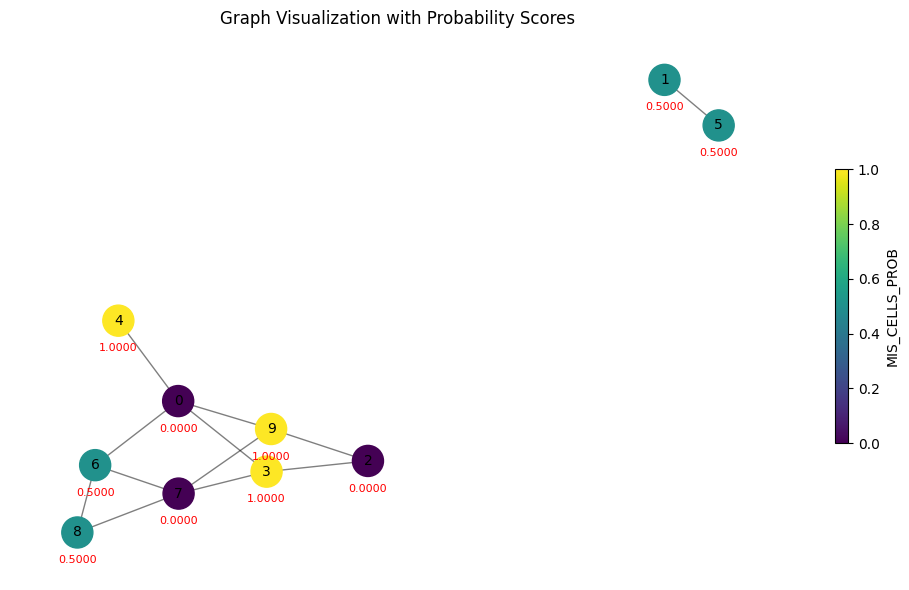

Graph image saved to 'temp_images/graph.png'.


In [5]:
import sys
sys.path.append('modelAttempt2_5')
from tools3 import MISGraphDataset  # Ensure this module is in your PYTHONPATH or working directory
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import matplotlib.colors as mcolors  # For converting colormap colors to hex

# ------------------------------------------------------------------------------
# Set your file paths here:
edgelist_path = "modelAttempt2_5/test_generated_graphs/nodes_10/removal_75percent/graph_11.edgelist"  # <-- Replace with your edgelist file path
json_path = "modelAttempt2_5/test_mis_results_grouped_v3/nodes_10_removal_75percent.json"     # <-- Replace with your JSON file path (or set to None if not used)
# ------------------------------------------------------------------------------

# Check if the edgelist file exists
if not os.path.exists(edgelist_path):
    print(f"Error: Edgelist file '{edgelist_path}' does not exist.")
else:
    # If a JSON file is provided, check its existence
    if json_path and not os.path.exists(json_path):
        print(f"Error: JSON file '{json_path}' does not exist.")
    else:
        # Load the graph data from the edgelist using MISGraphDataset.
        # We pass an empty list for json_paths because we're handling JSON separately.
        dataset = MISGraphDataset(
            json_paths=[],  
            edgelist_dirs=[edgelist_path],
            label_type='prob'
        )

        if len(dataset) == 0:
            print("Error: Dataset is empty. Exiting.")
        else:
            graph_data = dataset[0]
            num_nodes = graph_data.num_nodes
            print(f"Loaded graph with {num_nodes} nodes.")

            # Initialize default scores and node colors
            scores = np.zeros(num_nodes)
            node_colors = ['lightblue'] * num_nodes

            # Process JSON (if provided) to update scores and node colors based on MIS_CELLS_PROB
            matching_entry = None
            if json_path:
                try:
                    with open(json_path, 'r') as f:
                        json_data = json.load(f)

                    # Look for the matching JSON entry by comparing file names
                    for entry in json_data:
                        entry_file_path = os.path.normpath(entry.get("file_path", ""))
                        target_file_path = os.path.normpath(edgelist_path)
                        if os.path.basename(entry_file_path) == os.path.basename(target_file_path):
                            matching_entry = entry
                            break

                    if matching_entry:
                        mis_cells_prob = matching_entry.get("MIS_CELLS_PROB", [])
                        print(f"MIS_CELLS_PROB from JSON: {mis_cells_prob}")
                        if len(mis_cells_prob) != num_nodes:
                            print(f"Warning: Length of MIS_CELLS_PROB ({len(mis_cells_prob)}) does not match number of nodes ({num_nodes}). Using default scores.")
                        else:
                            scores = mis_cells_prob
                            # Update node colors based on the provided probability scores using a colormap
                            norm = plt.Normalize(vmin=min(scores), vmax=max(scores))
                            cmap = plt.cm.viridis
                            node_colors = [mcolors.to_hex(cmap(norm(prob))) for prob in scores]
                            print("Node colors updated based on MIS_CELLS_PROB from JSON.")
                    else:
                        print(f"Warning: No matching entry found in JSON for edgelist path '{edgelist_path}'. Using default node colors and scores.")

                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON file '{json_path}': {e}")
                    print("Proceeding with default node colors and scores.")
                except Exception as e:
                    print(f"Unexpected error while processing JSON file: {e}")
                    print("Proceeding with default node colors and scores.")

            # Create the temp_images/ directory if it doesn't exist and set the output image path.
            images_dir = "temp_images"
            os.makedirs(images_dir, exist_ok=True)
            image_path = os.path.join(images_dir, "graph.png")

            # Convert the edge_index tensor to a list of edges
            edge_index = graph_data.edge_index.cpu().numpy()
            edges = list(zip(edge_index[0], edge_index[1]))

            # Create a NetworkX graph from the edges
            G = nx.Graph()
            G.add_edges_from(edges)
            # Ensure all nodes are present (including any isolated nodes)
            G.add_nodes_from(range(num_nodes))

            # Compute positions for the nodes using a consistent layout (e.g., spring layout)
            pos = nx.spring_layout(G, seed=42)

            # Create labels for the nodes (using node IDs)
            node_labels = {i: str(i) for i in G.nodes()}

            # Align node_colors with the order of nodes in NetworkX
            node_order = list(G.nodes())
            node_colors_ordered = [node_colors[node] for node in node_order]

            # Set up the plot
            plt.figure(figsize=(10, 6))
            nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors_ordered)
            nx.draw_networkx_edges(G, pos, alpha=0.5)
            nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

            # Add score labels below each node
            x_vals, y_vals = zip(*pos.values())
            y_min, y_max = min(y_vals), max(y_vals)
            offset = (y_max - y_min) * 0.05  # Offset (5% of y-axis range)
            for node, (x, y) in pos.items():
                score = scores[node] if len(scores) > node else 0.0
                plt.text(x, y - offset, f"{score:.4f}", fontsize=8, ha='center', va='top', color='red')

            # Get the current Axes
            ax = plt.gca()
            # Add a colorbar using the current Axes
            if json_path and matching_entry and len(scores) == num_nodes:
                sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
                sm.set_array([])
                cbar = plt.colorbar(sm, ax=ax, shrink=0.5)
                cbar.set_label('MIS_CELLS_PROB')
            else:
                norm_scores = plt.Normalize(vmin=min(scores), vmax=max(scores))
                cmap_scores = plt.cm.viridis
                sm = plt.cm.ScalarMappable(cmap=cmap_scores, norm=norm_scores)
                sm.set_array([])
                cbar = plt.colorbar(sm, ax=ax, shrink=0.5)
                cbar.set_label('Score')

            plt.title("Graph Visualization with Probability Scores")
            plt.axis('off')
            plt.tight_layout()
            plt.savefig(image_path, format="PNG")
            plt.show()  # Display the plot inline in Jupyter
            print(f"Graph image saved to '{image_path}'.")


Loaded graph with 30 nodes.


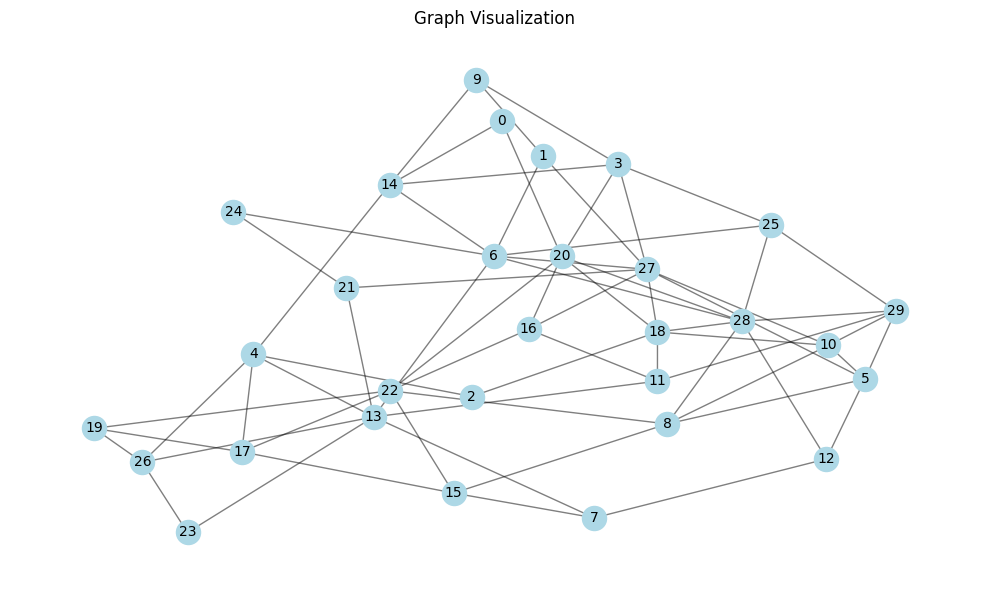

In [10]:
import sys
sys.path.append('modelAttempt2_5')
from tools3 import MISGraphDataset  # Ensure this module is accessible
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------------------
# Set your edgelist file path:
edgelist_path = "modelAttempt2_5/test_generated_graphs/nodes_30/removal_85percent/graph_28.edgelist"
# ------------------------------------------------------------------------------

# Check if the edgelist file exists
if not os.path.exists(edgelist_path):
    print(f"Error: Edgelist file '{edgelist_path}' does not exist.")
else:
    # Load the graph data from the edgelist using MISGraphDataset.
    dataset = MISGraphDataset(
        json_paths=[],  
        edgelist_dirs=[edgelist_path],
        label_type='prob'
    )

    if len(dataset) == 0:
        print("Error: Dataset is empty. Exiting.")
    else:
        graph_data = dataset[0]
        num_nodes = graph_data.num_nodes
        print(f"Loaded graph with {num_nodes} nodes.")

        # Convert the edge_index tensor to a list of edges
        edge_index = graph_data.edge_index.cpu().numpy()
        edges = list(zip(edge_index[0], edge_index[1]))

        # Create a NetworkX graph from the edges
        G = nx.Graph()
        G.add_edges_from(edges)
        # Ensure all nodes are included (in case there are isolated nodes)
        G.add_nodes_from(range(num_nodes))

        # Compute positions using a spring layout with custom parameters:
        # k: optimal distance between nodes (set lower to keep nodes closer)
        # scale: overall scale of the layout (smaller scale means nodes are closer to center)
        pos = nx.spring_layout(G, seed=42)

        # Reposition isolated nodes (nodes with no neighbors) closer to the center.
        for node in G.nodes():
            if G.degree(node) == 0:
                pos[node] = (np.random.uniform(-0.1, 0.1), np.random.uniform(-0.1, 0.1))

        # Set up the plot, drawing nodes, edges, and node labels (node numbers)
        plt.figure(figsize=(10, 6))
        nx.draw_networkx_nodes(G, pos, node_size=300, node_color="lightblue")
        nx.draw_networkx_edges(G, pos, alpha=0.5)
        # Create a dictionary mapping each node to its label (its node number)
        labels = {node: str(node) for node in G.nodes()}
        nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="black")

        plt.title("Graph Visualization")
        plt.axis("off")
        plt.tight_layout()
        plt.show()  # Display the plot inline in Jupyter


Loaded graph with 10 nodes.


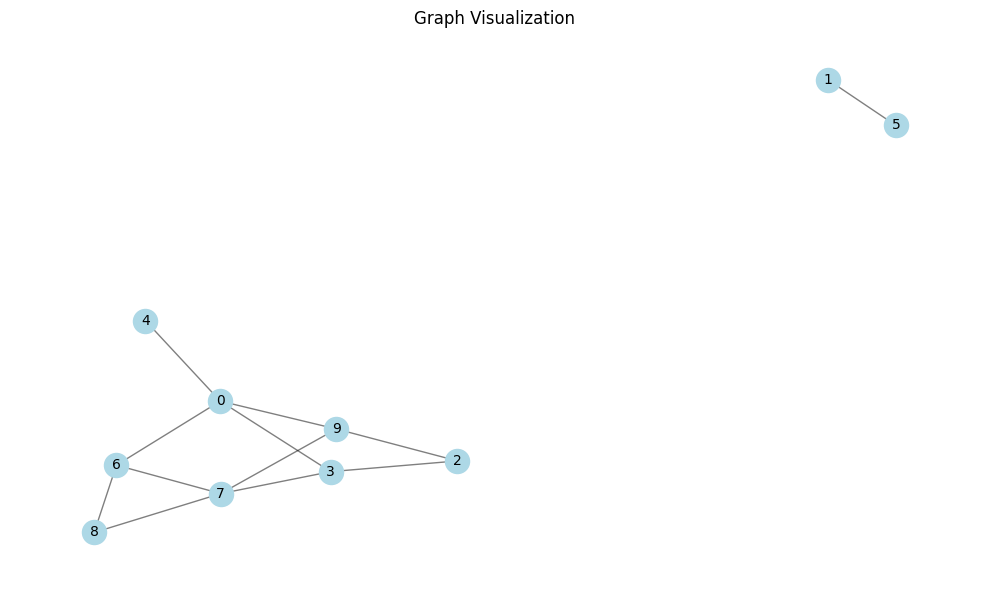

Available nodes: [np.int64(0), np.int64(3), np.int64(4), np.int64(6), np.int64(9), np.int64(1), np.int64(5), np.int64(2), np.int64(7), np.int64(8)]
Selecting node: 1 (Degree: 1)
Removed node 1 and its neighbors: [np.int64(5)]

Available nodes: [np.int64(0), np.int64(3), np.int64(4), np.int64(6), np.int64(9), np.int64(2), np.int64(7), np.int64(8)]
Selecting node: 4 (Degree: 1)
Removed node 4 and its neighbors: [np.int64(0)]

Available nodes: [np.int64(3), np.int64(6), np.int64(9), np.int64(2), np.int64(7), np.int64(8)]
Selecting node: 2 (Degree: 2)
Removed node 2 and its neighbors: [np.int64(3), np.int64(9)]

Available nodes: [np.int64(6), np.int64(7), np.int64(8)]
Selecting node: 6 (Degree: 2)
Removed node 6 and its neighbors: [np.int64(7), np.int64(8)]

Nodes selected in order for the greedy MIS:
1
4
2
6
Greedy MIS size: 4


In [6]:
import sys
sys.path.append('modelAttempt2_5')
from tools3 import MISGraphDataset  # Ensure this module is accessible
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------------------
# Set your edgelist file path:
edgelist_path = "modelAttempt2_5/test_generated_graphs/nodes_10/removal_75percent/graph_11.edgelist"
# ------------------------------------------------------------------------------

# Check if the edgelist file exists
if not os.path.exists(edgelist_path):
    print(f"Error: Edgelist file '{edgelist_path}' does not exist.")
else:
    # Load the graph data from the edgelist using MISGraphDataset.
    dataset = MISGraphDataset(
        json_paths=[],  
        edgelist_dirs=[edgelist_path],
        label_type='prob'
    )

    if len(dataset) == 0:
        print("Error: Dataset is empty. Exiting.")
    else:
        graph_data = dataset[0]
        num_nodes = graph_data.num_nodes
        print(f"Loaded graph with {num_nodes} nodes.")

        # Convert the edge_index tensor to a list of edges
        edge_index = graph_data.edge_index.cpu().numpy()
        edges = list(zip(edge_index[0], edge_index[1]))

        # Create a NetworkX graph from the edges
        G = nx.Graph()
        G.add_edges_from(edges)
        # Ensure all nodes are included (in case there are isolated nodes)
        G.add_nodes_from(range(num_nodes))

        # Compute positions using a spring layout with custom parameters:
        pos = nx.spring_layout(G, seed=42)

        # Reposition isolated nodes (nodes with no neighbors) closer to the center.
        for node in G.nodes():
            if G.degree(node) == 0:
                pos[node] = (np.random.uniform(-0.1, 0.1), np.random.uniform(-0.1, 0.1))

        # Set up the plot, drawing nodes, edges, and node labels (node numbers)
        plt.figure(figsize=(10, 6))
        nx.draw_networkx_nodes(G, pos, node_size=300, node_color="lightblue")
        nx.draw_networkx_edges(G, pos, alpha=0.5)
        labels = {node: str(node) for node in G.nodes()}
        nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="black")
        plt.title("Graph Visualization")
        plt.axis("off")
        plt.tight_layout()
        plt.show()  # Display the plot inline in Jupyter

        # -------------------------------
        # Min Degree Greedy MIS Algorithm
        # -------------------------------
        # Create a copy of the graph to modify during the greedy search.
        H = G.copy()
        greedy_mis = []  # List to store nodes selected in order

        while H.nodes():
            # Print available nodes at the current step
            current_nodes = list(H.nodes())
            print("Available nodes:", current_nodes)
            
            # Select the node with the minimum degree from the current graph H.
            min_deg_node = min(sorted(H.nodes()), key=H.degree)
            print(f"Selecting node: {min_deg_node} (Degree: {H.degree(min_deg_node)})")
            greedy_mis.append(min_deg_node)
            
            # Remove the selected node and its neighbors to maintain independence.
            neighbors = list(H.neighbors(min_deg_node))
            H.remove_node(min_deg_node)
            H.remove_nodes_from(neighbors)
            print(f"Removed node {min_deg_node} and its neighbors: {neighbors}\n")

        # Print each node selected in order.
        print("Nodes selected in order for the greedy MIS:")
        for node in greedy_mis:
            print(node)

        # Print the size of the greedy MIS.
        print(f"Greedy MIS size: {len(greedy_mis)}")


Loaded graph with 10 nodes.
MIS_CELLS_PROB from JSON: [0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5]
Node colors updated based on MIS_CELLS_PROB from JSON.


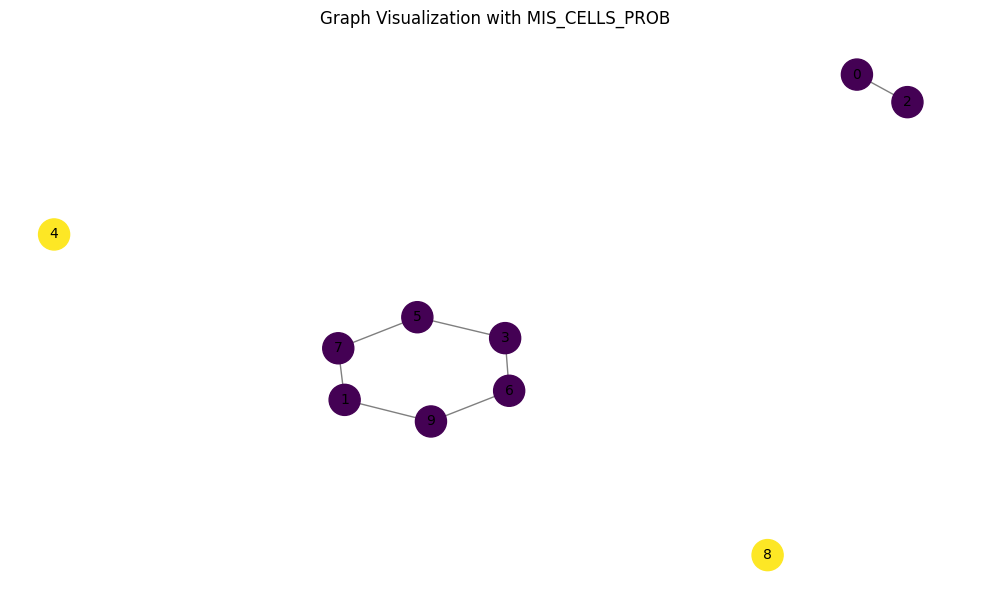


Assigned node probabilities (from MIS_CELLS_PROB):
  Node 0: 0.5000
  Node 1: 0.5000
  Node 2: 0.5000
  Node 3: 0.5000
  Node 4: 1.0000
  Node 5: 0.5000
  Node 6: 0.5000
  Node 7: 0.5000
  Node 8: 1.0000
  Node 9: 0.5000

Available nodes: [np.int64(0), np.int64(2), np.int64(1), np.int64(7), np.int64(9), np.int64(3), np.int64(5), np.int64(6), 4, 8]
  Node 0 -> Neighbor Prob Sum: 0.5000
  Node 1 -> Neighbor Prob Sum: 1.0000
  Node 2 -> Neighbor Prob Sum: 0.5000
  Node 3 -> Neighbor Prob Sum: 1.0000
  Node 4 -> Neighbor Prob Sum: 0.0000
  Node 5 -> Neighbor Prob Sum: 1.0000
  Node 6 -> Neighbor Prob Sum: 1.0000
  Node 7 -> Neighbor Prob Sum: 1.0000
  Node 8 -> Neighbor Prob Sum: 0.0000
  Node 9 -> Neighbor Prob Sum: 1.0000
Selecting node: 4 (Neighbor Prob Sum: 0.0000)
Removed node 4 and its neighbors: []

Available nodes: [np.int64(0), np.int64(2), np.int64(1), np.int64(7), np.int64(9), np.int64(3), np.int64(5), np.int64(6), 8]
  Node 0 -> Neighbor Prob Sum: 0.5000
  Node 1 -> Neighbor P

In [17]:
import sys
sys.path.append('modelAttempt2_5')
from tools3 import MISGraphDataset  # Ensure this module is accessible
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import matplotlib.colors as mcolors

# ------------------------------------------------------------------------------
# Set your file paths here:
# edgelist_path = "modelAttempt2_5/test_generated_graphs/nodes_10/removal_75percent/graph_11.edgelist"
edgelist_path = "modelAttempt2_5/test_generated_graphs/nodes_10/removal_85percent/graph_24.edgelist"  # <-- Replace with your edgelist file path
json_path = "modelAttempt2_5/test_mis_results_grouped_v3/nodes_10_removal_85percent.json"             # <-- Replace with your JSON file path (or set to None if not used)
# ------------------------------------------------------------------------------

# Check if the edgelist file exists
if not os.path.exists(edgelist_path):
    print(f"Error: Edgelist file '{edgelist_path}' does not exist.")
else:
    # If a JSON file is provided, check its existence
    if json_path and not os.path.exists(json_path):
        print(f"Error: JSON file '{json_path}' does not exist.")
    else:
        # Load the graph data from the edgelist using MISGraphDataset.
        # We pass an empty list for json_paths because we'll handle JSON separately.
        dataset = MISGraphDataset(
            json_paths=[],  
            edgelist_dirs=[edgelist_path],
            label_type='prob'
        )

        if len(dataset) == 0:
            print("Error: Dataset is empty. Exiting.")
        else:
            graph_data = dataset[0]
            num_nodes = graph_data.num_nodes
            print(f"Loaded graph with {num_nodes} nodes.")

            # Initialize default scores (all zeros) and default node colors.
            scores = np.zeros(num_nodes)
            node_colors = ['lightblue'] * num_nodes

            # Process JSON (if provided) to update scores and node colors based on MIS_CELLS_PROB.
            matching_entry = None
            if json_path:
                try:
                    with open(json_path, 'r') as f:
                        json_data = json.load(f)

                    # Look for the matching JSON entry by comparing file names.
                    for entry in json_data:
                        entry_file_path = os.path.normpath(entry.get("file_path", ""))
                        target_file_path = os.path.normpath(edgelist_path)
                        if os.path.basename(entry_file_path) == os.path.basename(target_file_path):
                            matching_entry = entry
                            break

                    if matching_entry:
                        mis_cells_prob = matching_entry.get("MIS_CELLS_PROB", [])
                        print(f"MIS_CELLS_PROB from JSON: {mis_cells_prob}")
                        if len(mis_cells_prob) != num_nodes:
                            print(f"Warning: Length of MIS_CELLS_PROB ({len(mis_cells_prob)}) does not match number of nodes ({num_nodes}). Using default scores.")
                        else:
                            scores = mis_cells_prob
                            # Update node colors based on the probability scores.
                            norm = plt.Normalize(vmin=min(scores), vmax=max(scores))
                            cmap = plt.cm.viridis
                            node_colors = [mcolors.to_hex(cmap(norm(prob))) for prob in scores]
                            print("Node colors updated based on MIS_CELLS_PROB from JSON.")
                    else:
                        print(f"Warning: No matching entry found in JSON for edgelist path '{edgelist_path}'. Using default node colors and scores.")

                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON file '{json_path}': {e}")
                    print("Proceeding with default node colors and scores.")
                except Exception as e:
                    print(f"Unexpected error while processing JSON file: {e}")
                    print("Proceeding with default node colors and scores.")

            # Build a NetworkX graph from the graph_data.
            edge_index = graph_data.edge_index.cpu().numpy()
            edges = list(zip(edge_index[0], edge_index[1]))
            G = nx.Graph()
            G.add_edges_from(edges)
            # Ensure all nodes are included (to account for isolated nodes).
            G.add_nodes_from(range(num_nodes))

            # Compute positions (e.g., using a spring layout).
            pos = nx.spring_layout(G, seed=42)
            
            # (Optional) Visualize the graph with node colors.
            plt.figure(figsize=(10, 6))
            # Align node colors with the node order in G.
            node_order = list(G.nodes())
            node_colors_ordered = [node_colors[node] for node in node_order]
            nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors_ordered)
            nx.draw_networkx_edges(G, pos, alpha=0.5)
            nx.draw_networkx_labels(G, pos, labels={i: str(i) for i in G.nodes()}, font_size=10, font_color='black')
            plt.title("Graph Visualization with MIS_CELLS_PROB")
            plt.axis('off')
            plt.tight_layout()
            plt.show()

            # -------------------------------------------------------------
            # Greedy MIS using Low Neighbor Probability (using MIS_CELLS_PROB)
            # -------------------------------------------------------------
            # Use the loaded scores from JSON as node probabilities.
            node_probs = {i: float(scores[i]) for i in range(num_nodes)}
            print("\nAssigned node probabilities (from MIS_CELLS_PROB):")
            for node, prob in node_probs.items():
                print(f"  Node {node}: {prob:.4f}")

            # Create a copy of the graph to modify during the greedy search.
            H = G.copy()
            greedy_mis = []  # List to store selected nodes in order

            while H.nodes():
                # Print available nodes at the current step.
                current_nodes = list(H.nodes())
                print("\nAvailable nodes:", current_nodes)
                
                best_node = None
                best_neighbor_prob_sum = float('inf')
                
                # For each available node, compute the sum of probabilities of its neighbors.
                for node in sorted(H.nodes()):
                    neighbors = list(H.neighbors(node))
                    neighbor_prob_sum = sum(node_probs[neigh] for neigh in neighbors)
                    print(f"  Node {node} -> Neighbor Prob Sum: {neighbor_prob_sum:.4f}")
                    if neighbor_prob_sum < best_neighbor_prob_sum:
                        best_neighbor_prob_sum = neighbor_prob_sum
                        best_node = node

                if best_node is None:
                    break

                print(f"Selecting node: {best_node} (Neighbor Prob Sum: {best_neighbor_prob_sum:.4f})")
                greedy_mis.append(best_node)
                
                # Remove the selected node and its neighbors.
                neighbors = list(H.neighbors(best_node))
                H.remove_node(best_node)
                H.remove_nodes_from(neighbors)
                print(f"Removed node {best_node} and its neighbors: {neighbors}")

            # Print the resulting greedy MIS.
            print("\nNodes selected in order for the greedy MIS (low neighbor probability):")
            for node in greedy_mis:
                print(node)
            print(f"Greedy MIS size: {len(greedy_mis)}")


Loaded graph with 15 nodes.
MIS_CELLS_PROB from JSON: [0.0, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.5, 0.0, 1.0, 0.5]
Node colors updated based on MIS_CELLS_PROB from JSON.


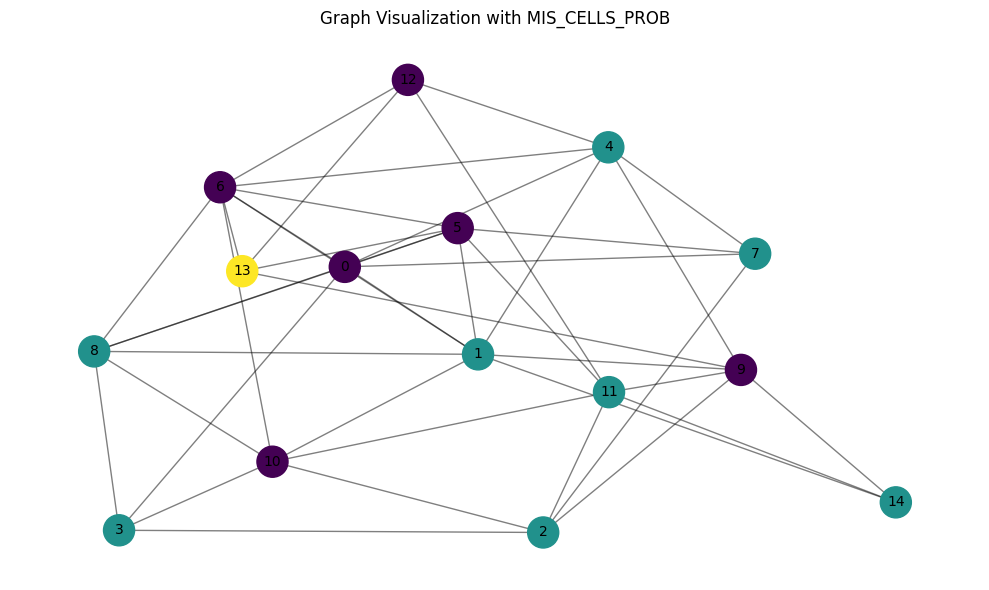


Assigned node probabilities (from MIS_CELLS_PROB):
  Node 0: 0.0000
  Node 1: 0.5000
  Node 2: 0.5000
  Node 3: 0.5000
  Node 4: 0.5000
  Node 5: 0.0000
  Node 6: 0.0000
  Node 7: 0.5000
  Node 8: 0.5000
  Node 9: 0.0000
  Node 10: 0.0000
  Node 11: 0.5000
  Node 12: 0.0000
  Node 13: 1.0000
  Node 14: 0.5000

Nodes sorted by descending probability:
  Node 13: 1.0000
  Node 1: 0.5000
  Node 2: 0.5000
  Node 3: 0.5000
  Node 4: 0.5000
  Node 7: 0.5000
  Node 8: 0.5000
  Node 11: 0.5000
  Node 14: 0.5000
  Node 0: 0.0000
  Node 5: 0.0000
  Node 6: 0.0000
  Node 9: 0.0000
  Node 10: 0.0000
  Node 12: 0.0000
Selecting node 13 (prob 1.0000).
Selecting node 1 (prob 0.5000).
Selecting node 2 (prob 0.5000).
Skipping node 3 (prob 0.5000) because a neighbor is already selected.
Skipping node 4 (prob 0.5000) because a neighbor is already selected.
Skipping node 7 (prob 0.5000) because a neighbor is already selected.
Skipping node 8 (prob 0.5000) because a neighbor is already selected.
Skipping n

In [13]:
import sys
sys.path.append('modelAttempt2_5')
from tools3 import MISGraphDataset  # Ensure this module is accessible
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import matplotlib.colors as mcolors

# ------------------------------------------------------------------------------
# Set your file paths here:
edgelist_path = "modelAttempt2_5/test_generated_graphs/nodes_15/removal_60percent/graph_11.edgelist"  # <-- Replace with your edgelist file path
json_path = "modelAttempt2_5/test_mis_results_grouped_v3/nodes_15_removal_60percent.json"             # <-- Replace with your JSON file path (or set to None if not used)
# ------------------------------------------------------------------------------

# Check if the edgelist file exists
if not os.path.exists(edgelist_path):
    print(f"Error: Edgelist file '{edgelist_path}' does not exist.")
else:
    # If a JSON file is provided, check its existence
    if json_path and not os.path.exists(json_path):
        print(f"Error: JSON file '{json_path}' does not exist.")
    else:
        # Load the graph data from the edgelist using MISGraphDataset.
        # We pass an empty list for json_paths because we'll handle JSON separately.
        dataset = MISGraphDataset(
            json_paths=[],  
            edgelist_dirs=[edgelist_path],
            label_type='prob'
        )

        if len(dataset) == 0:
            print("Error: Dataset is empty. Exiting.")
        else:
            graph_data = dataset[0]
            num_nodes = graph_data.num_nodes
            print(f"Loaded graph with {num_nodes} nodes.")

            # Initialize default scores (all zeros) and default node colors.
            scores = np.zeros(num_nodes)
            node_colors = ['lightblue'] * num_nodes

            # Process JSON (if provided) to update scores and node colors based on MIS_CELLS_PROB.
            matching_entry = None
            if json_path:
                try:
                    with open(json_path, 'r') as f:
                        json_data = json.load(f)

                    # Look for the matching JSON entry by comparing file names.
                    for entry in json_data:
                        entry_file_path = os.path.normpath(entry.get("file_path", ""))
                        target_file_path = os.path.normpath(edgelist_path)
                        if os.path.basename(entry_file_path) == os.path.basename(target_file_path):
                            matching_entry = entry
                            break

                    if matching_entry:
                        mis_cells_prob = matching_entry.get("MIS_CELLS_PROB", [])
                        print(f"MIS_CELLS_PROB from JSON: {mis_cells_prob}")
                        if len(mis_cells_prob) != num_nodes:
                            print(f"Warning: Length of MIS_CELLS_PROB ({len(mis_cells_prob)}) does not match number of nodes ({num_nodes}). Using default scores.")
                        else:
                            scores = mis_cells_prob
                            # Update node colors based on the probability scores.
                            norm = plt.Normalize(vmin=min(scores), vmax=max(scores))
                            cmap = plt.cm.viridis
                            node_colors = [mcolors.to_hex(cmap(norm(prob))) for prob in scores]
                            print("Node colors updated based on MIS_CELLS_PROB from JSON.")
                    else:
                        print(f"Warning: No matching entry found in JSON for edgelist path '{edgelist_path}'. Using default node colors and scores.")

                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON file '{json_path}': {e}")
                    print("Proceeding with default node colors and scores.")
                except Exception as e:
                    print(f"Unexpected error while processing JSON file: {e}")
                    print("Proceeding with default node colors and scores.")

            # Build a NetworkX graph from the graph_data.
            edge_index = graph_data.edge_index.cpu().numpy()
            edges = list(zip(edge_index[0], edge_index[1]))
            G = nx.Graph()
            G.add_edges_from(edges)
            # Ensure all nodes are included (to account for isolated nodes).
            G.add_nodes_from(range(num_nodes))

            # Compute positions (e.g., using a spring layout).
            pos = nx.spring_layout(G, seed=42)
            
            # (Optional) Visualize the graph with node colors.
            plt.figure(figsize=(10, 6))
            # Align node colors with the node order in G.
            node_order = list(G.nodes())
            node_colors_ordered = [node_colors[node] for node in node_order]
            nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors_ordered)
            nx.draw_networkx_edges(G, pos, alpha=0.5)
            nx.draw_networkx_labels(G, pos, labels={i: str(i) for i in G.nodes()}, font_size=10, font_color='black')
            plt.title("Graph Visualization with MIS_CELLS_PROB")
            plt.axis('off')
            plt.tight_layout()
            plt.show()

            # -------------------------------------------------------------
            # Greedy MIS using Probability (greedy_mis_prob)
            # -------------------------------------------------------------
            # Use the loaded scores from JSON as node probabilities.
            node_probs = {i: float(scores[i]) for i in range(num_nodes)}
            print("\nAssigned node probabilities (from MIS_CELLS_PROB):")
            for node, prob in node_probs.items():
                print(f"  Node {node}: {prob:.4f}")

            # Sort nodes in descending order of probability (with a tie-breaker on node id).
            sorted_nodes = sorted(node_probs.items(), key=lambda x: (-x[1], x[0]))
            print("\nNodes sorted by descending probability:")
            for node, prob in sorted_nodes:
                print(f"  Node {node}: {prob:.4f}")

            # Greedy MIS selection: iterate over sorted nodes, and select a node if none of its neighbors have been selected.
            selected = set()
            greedy_mis = []  # List to store nodes selected in order.
            for node, prob in sorted_nodes:
                # Check if any neighbor of this node is already selected.
                conflict = any(neighbor in selected for neighbor in G.neighbors(node))
                if conflict:
                    print(f"Skipping node {node} (prob {prob:.4f}) because a neighbor is already selected.")
                else:
                    print(f"Selecting node {node} (prob {prob:.4f}).")
                    selected.add(node)
                    greedy_mis.append(node)

            # Print the resulting greedy MIS.
            print("\nNodes selected in order for the greedy MIS (probability based):")
            for node in greedy_mis:
                print(node)
            print(f"Greedy MIS size: {len(greedy_mis)}")


Loaded graph with 25 nodes.


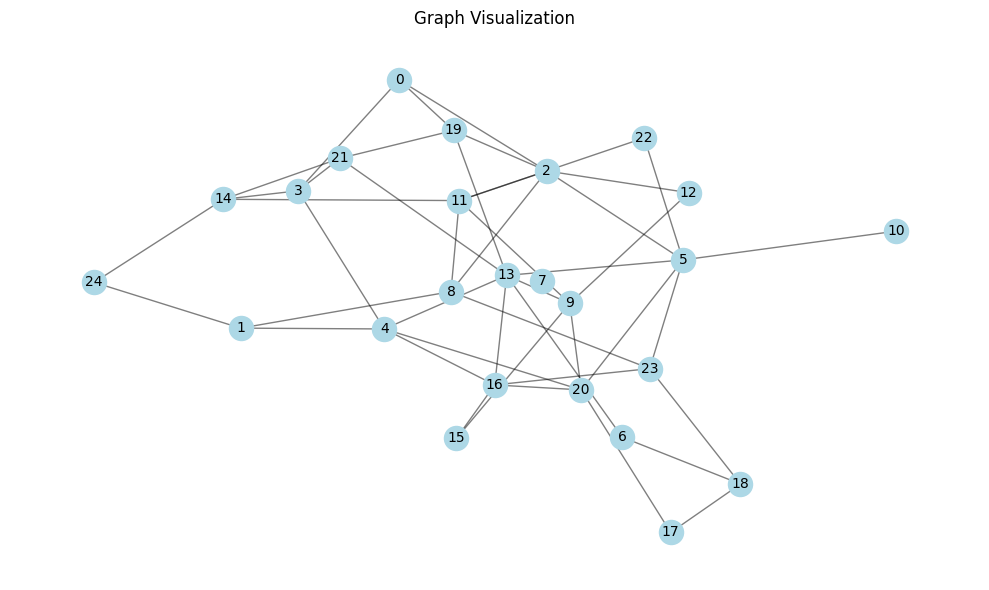

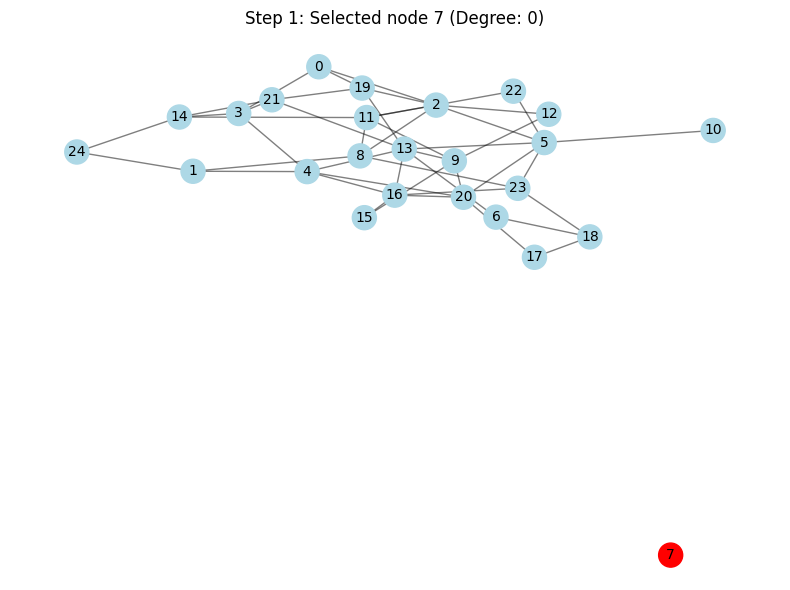

Step 1: Selected node 7 with degree 0.
         Neighbors to be removed: []


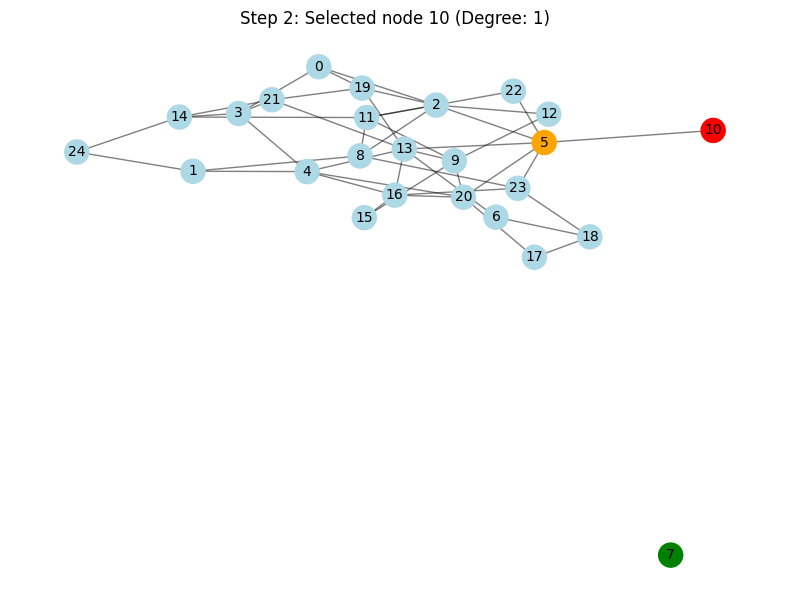

Step 2: Selected node 10 with degree 1.
         Neighbors to be removed: [np.int64(5)]


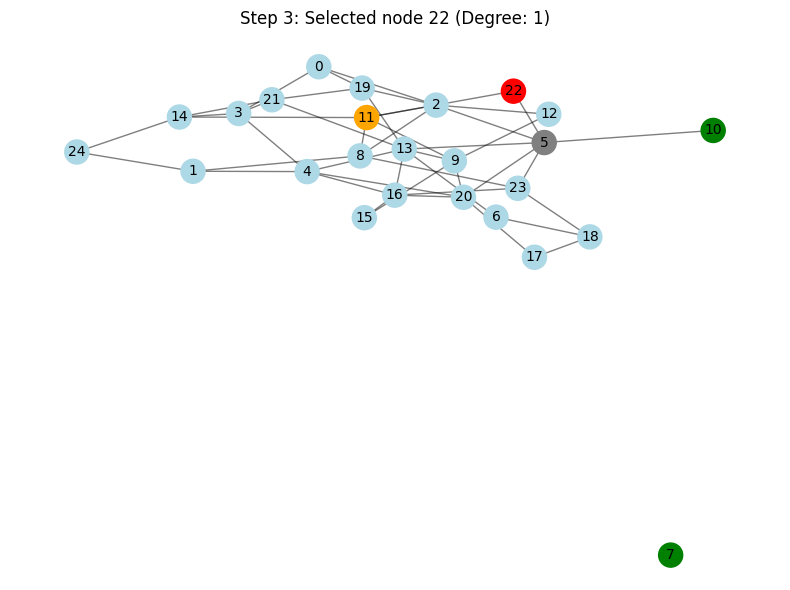

Step 3: Selected node 22 with degree 1.
         Neighbors to be removed: [np.int64(11)]


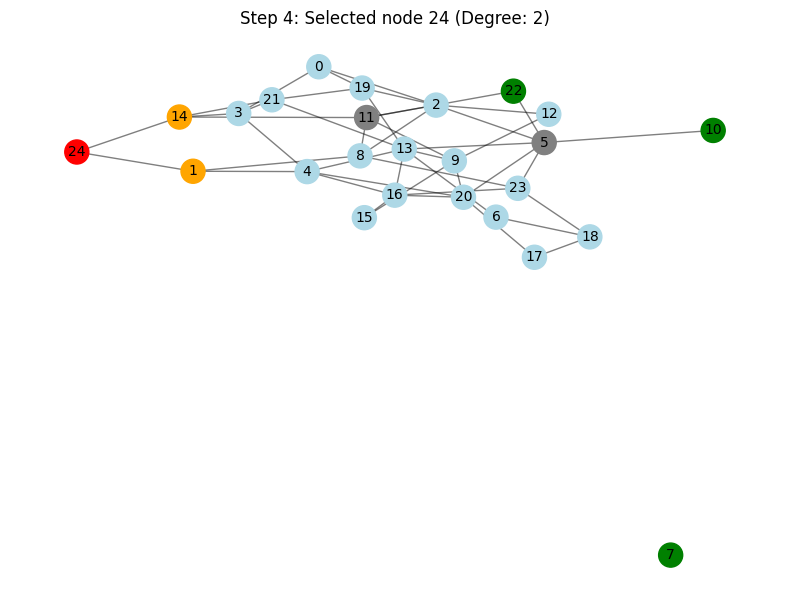

Step 4: Selected node 24 with degree 2.
         Neighbors to be removed: [np.int64(1), np.int64(14)]


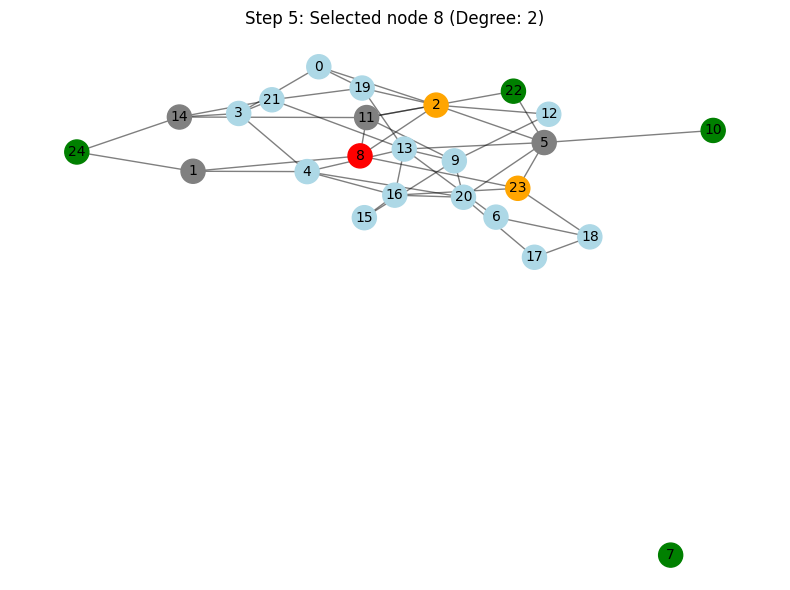

Step 5: Selected node 8 with degree 2.
         Neighbors to be removed: [np.int64(2), np.int64(23)]


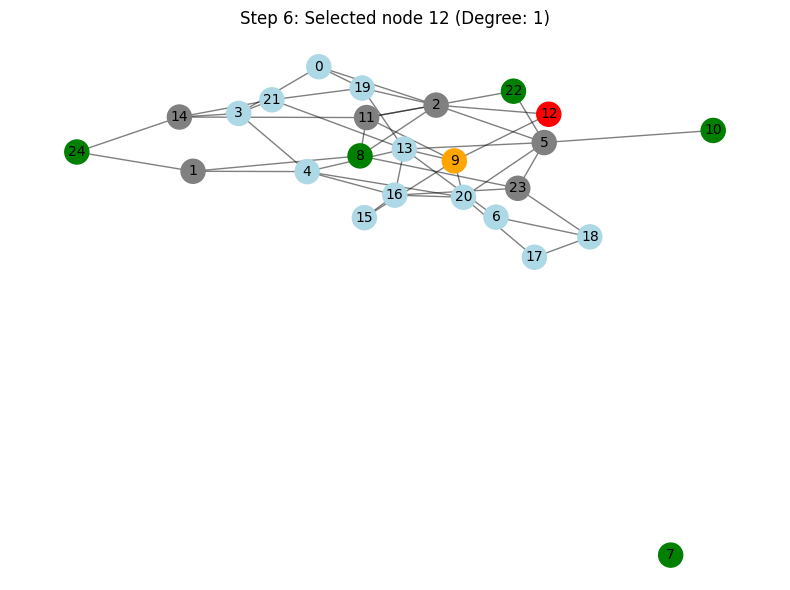

Step 6: Selected node 12 with degree 1.
         Neighbors to be removed: [np.int64(9)]


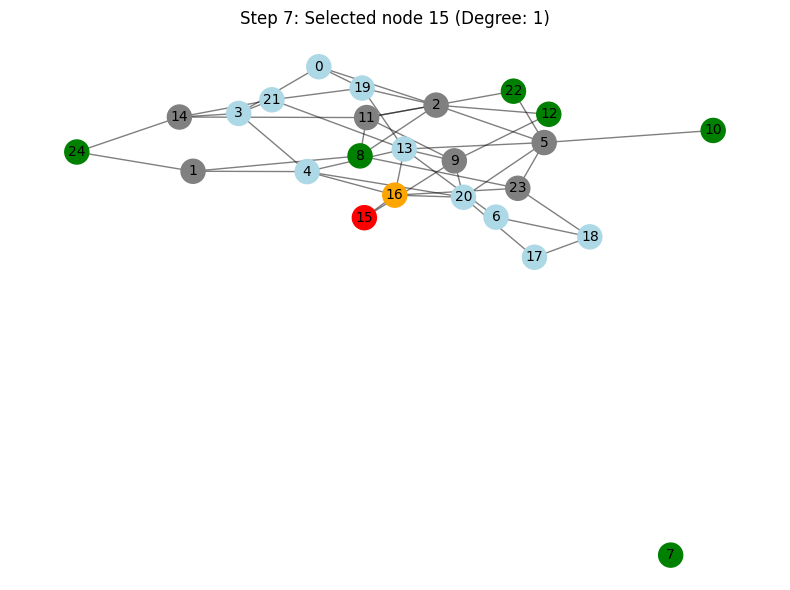

Step 7: Selected node 15 with degree 1.
         Neighbors to be removed: [np.int64(16)]


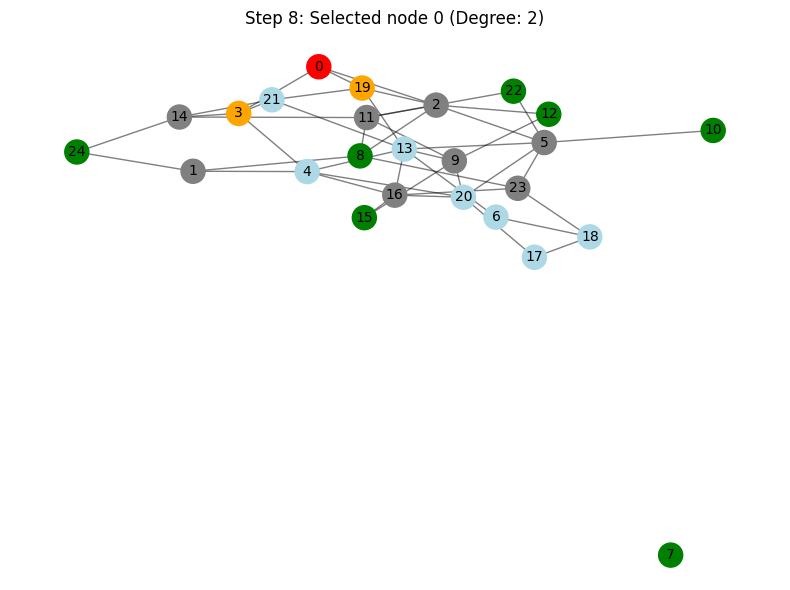

Step 8: Selected node 0 with degree 2.
         Neighbors to be removed: [np.int64(3), np.int64(19)]


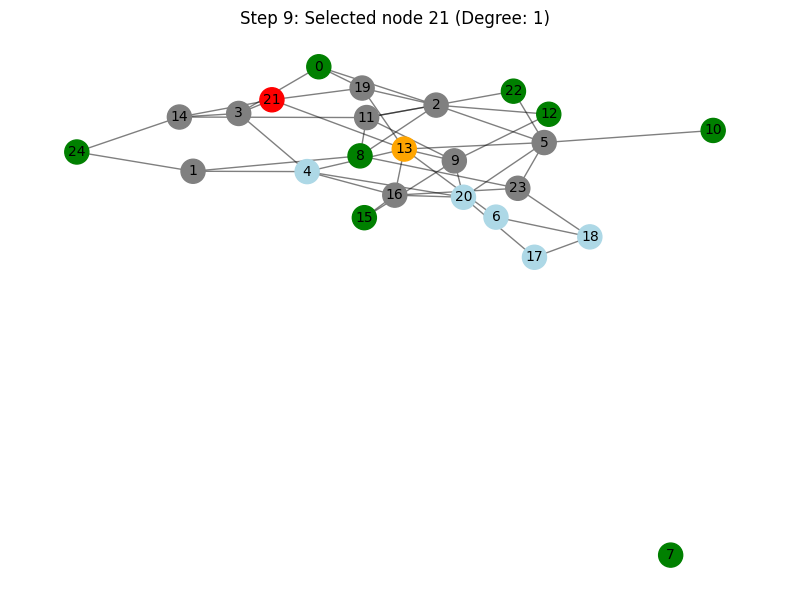

Step 9: Selected node 21 with degree 1.
         Neighbors to be removed: [np.int64(13)]


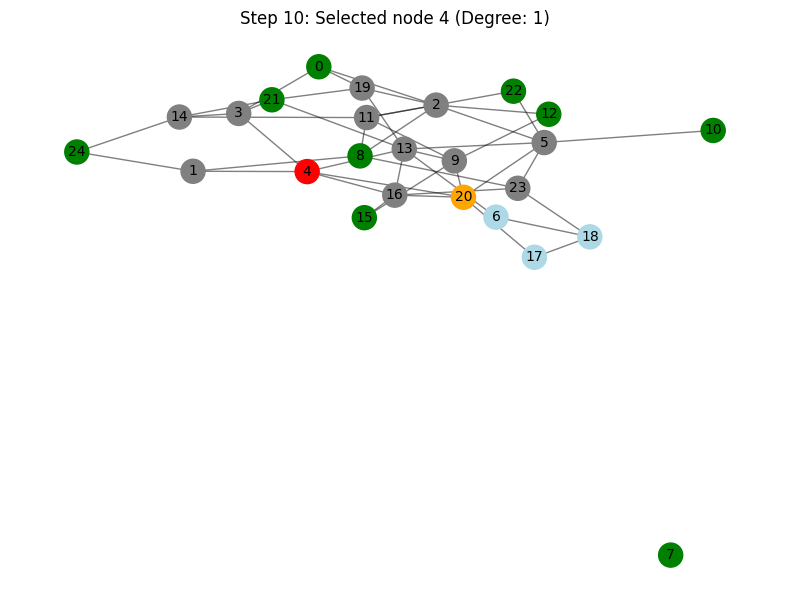

Step 10: Selected node 4 with degree 1.
         Neighbors to be removed: [np.int64(20)]


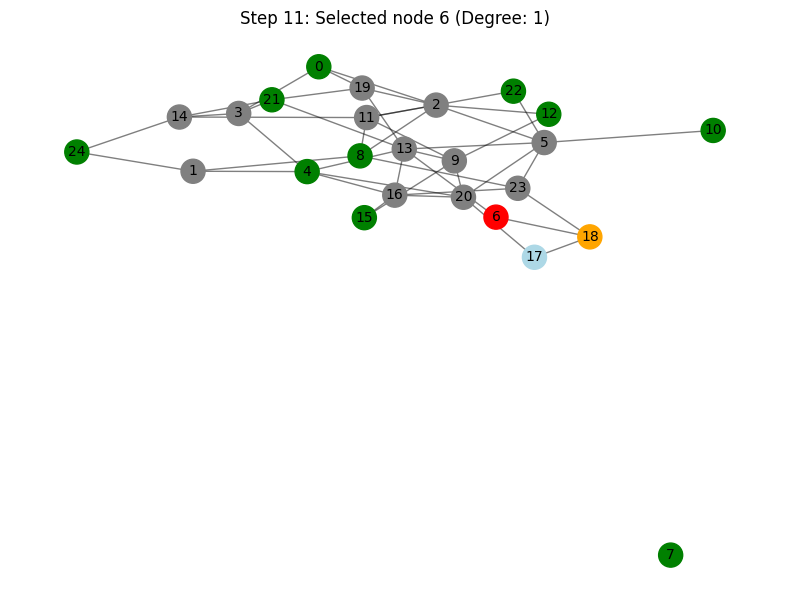

Step 11: Selected node 6 with degree 1.
         Neighbors to be removed: [np.int64(18)]


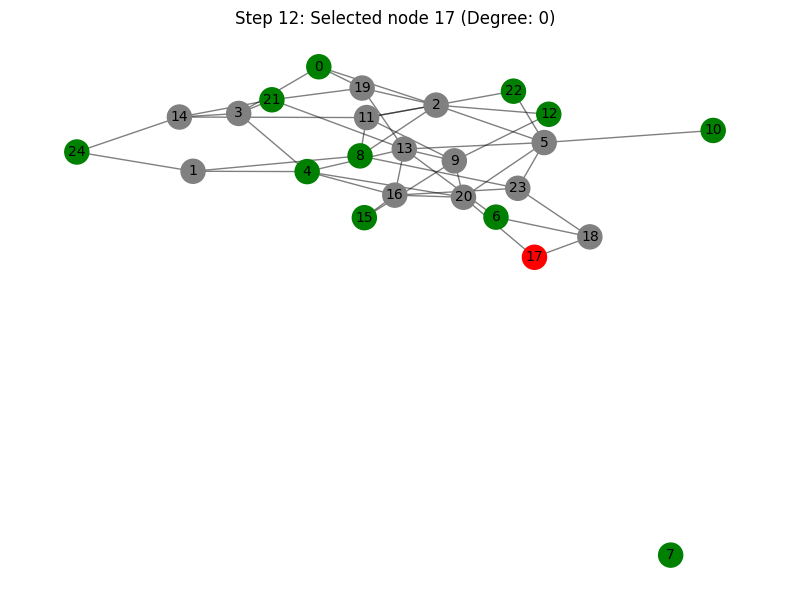

Step 12: Selected node 17 with degree 0.
         Neighbors to be removed: []

Final Greedy MIS selection order: [7, np.int64(10), np.int64(22), np.int64(24), np.int64(8), np.int64(12), np.int64(15), np.int64(0), np.int64(21), np.int64(4), np.int64(6), np.int64(17)]
Greedy MIS size: 12


In [14]:
import sys
sys.path.append('modelAttempt2_5')
from tools3 import MISGraphDataset  # Ensure this module is accessible
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def greedy_mis_min_degree_visual(G):
    """
    Greedy MIS algorithm using minimum-degree selection with step-by-step plotting.
    Uses the same logic as your standalone code:
      - At each step, select the node with the smallest degree in the current graph.
      - Remove that node and its neighbors.
    
    During each iteration, the function prints and plots:
      - The current selected node (in red)
      - Its neighbors to be removed (in orange)
      - Nodes already selected in previous steps (in green)
      - Nodes removed in previous steps (in gray)
      - Active nodes that remain (in light blue)
    
    Parameters:
        G (networkx.Graph): The original input graph.
    
    Returns:
        list: The order of nodes selected for the greedy MIS.
    """
    # Create a working copy of the graph.
    H = G.copy()
    greedy_mis = []  # List to store selected nodes in order.
    step = 0
    # Compute a fixed layout based on the original graph for consistent visualization.
    pos = nx.spring_layout(G, seed=42)
    
    while H.nodes():
        step += 1
        # Select the node with the minimum degree from the current working graph.
        # (This logic is identical to your standalone code.)
        min_deg_node = min(H.nodes(), key=H.degree)
        # Record its degree (before removal)
        node_degree = H.degree(min_deg_node)
        greedy_mis.append(min_deg_node)
        # Get neighbors that will be removed along with the selected node.
        neighbors = list(H.neighbors(min_deg_node))
        
        # Determine nodes already removed in previous steps:
        # (Nodes that are in the original graph G but not in H.)
        removed_nodes = set(G.nodes()) - set(H.nodes())
        
        # Prepare color coding for visualization:
        colors = []
        for node in G.nodes():
            if node in greedy_mis[:-1]:
                # Already selected in a previous step.
                colors.append('green')
            elif node == min_deg_node:
                # Current node selected.
                colors.append('red')
            elif node in neighbors:
                # Neighbors to be removed this step.
                colors.append('orange')
            elif node in removed_nodes:
                # Already removed (but not part of the MIS).
                colors.append('gray')
            else:
                # Still active.
                colors.append('lightblue')
        
        # Plot the full original graph with our color coding.
        plt.figure(figsize=(8, 6))
        nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=300)
        nx.draw_networkx_edges(G, pos, alpha=0.5)
        nx.draw_networkx_labels(G, pos, font_size=10)
        plt.title(f"Step {step}: Selected node {min_deg_node} (Degree: {node_degree})")
        plt.axis("off")
        plt.tight_layout()
        plt.show()
        
        # Print step information.
        print(f"Step {step}: Selected node {min_deg_node} with degree {node_degree}.")
        print(f"         Neighbors to be removed: {neighbors}")
        
        # Remove the selected node and its neighbors from H.
        H.remove_node(min_deg_node)
        H.remove_nodes_from(neighbors)
    
    print("\nFinal Greedy MIS selection order:", greedy_mis)
    print("Greedy MIS size:", len(greedy_mis))
    return greedy_mis

# ---------------------------
# Example usage replicating your standalone script:
# ---------------------------
if __name__ == "__main__":
    # ------------------------------------------------------------------------------
    # Set your edgelist file path:
    edgelist_path = "modelAttempt2_5/test_generated_graphs/nodes_25/removal_85percent/graph_7.edgelist"
    # ------------------------------------------------------------------------------
    
    # Check if the edgelist file exists.
    if not os.path.exists(edgelist_path):
        print(f"Error: Edgelist file '{edgelist_path}' does not exist.")
    else:
        # Load the graph data from the edgelist using MISGraphDataset.
        dataset = MISGraphDataset(
            json_paths=[],  
            edgelist_dirs=[edgelist_path],
            label_type='prob'
        )
    
        if len(dataset) == 0:
            print("Error: Dataset is empty. Exiting.")
        else:
            graph_data = dataset[0]
            num_nodes = graph_data.num_nodes
            print(f"Loaded graph with {num_nodes} nodes.")
    
            # Convert the edge_index tensor to a list of edges.
            edge_index = graph_data.edge_index.cpu().numpy()
            edges = list(zip(edge_index[0], edge_index[1]))
    
            # Create a NetworkX graph from the edges.
            G = nx.Graph()
            G.add_edges_from(edges)
            # Ensure all nodes are included (in case there are isolated nodes).
            G.add_nodes_from(range(num_nodes))
    
            # Compute positions using a spring layout with custom parameters.
            pos = nx.spring_layout(G, seed=42)
    
            # Reposition isolated nodes (nodes with no neighbors) closer to the center.
            for node in G.nodes():
                if G.degree(node) == 0:
                    pos[node] = (np.random.uniform(-0.1, 0.1), np.random.uniform(-0.1, 0.1))
    
            # Plot the original graph.
            plt.figure(figsize=(10, 6))
            nx.draw_networkx_nodes(G, pos, node_size=300, node_color="lightblue")
            nx.draw_networkx_edges(G, pos, alpha=0.5)
            labels = {node: str(node) for node in G.nodes()}
            nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="black")
            plt.title("Graph Visualization")
            plt.axis("off")
            plt.tight_layout()
            plt.show()
    
            # Run the visual greedy MIS algorithm.
            greedy_mis = greedy_mis_min_degree_visual(G)
